In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


In [2]:
%matplotlib inline

In [3]:
x = torch.linspace(0,799,steps=800)

In [4]:
y = torch.sin(x*2*3.1416/40)

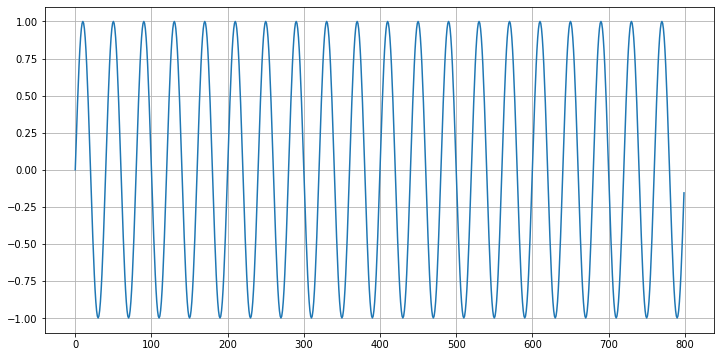

In [5]:

plt.figure(figsize=(12,6))
plt.plot(x,y)
plt.grid()

In [6]:
test_size = 40

In [7]:
train_set = y[:-test_size]
test_set = y[-test_size:]

In [8]:
train_set[0]

tensor(0.)

In [9]:
def input_data(seq,ws):  # ws is the window size
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

In [10]:
window_size = 40

In [11]:
train_data = input_data(train_set,window_size)

In [12]:
len(train_data)

720

In [13]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [14]:
class LSTM(nn.Module):
    
    def __init__(self,input_size =1,hidden_size = 50,output_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        self.linear = nn.Linear(hidden_size,output_size)
        
        self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))
        
    def forward(self,seq):
        
        lstm_out , self.hidden = self.lstm(seq.view(len(seq),1,-1),self.hidden)
        
        pred = self.linear(lstm_out.view(len(seq),-1))
        
        return pred[-1]

In [15]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

In [16]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

Epochs 1 has 0.06506766 loss
loss on test prediction is  tensor(0.5651)


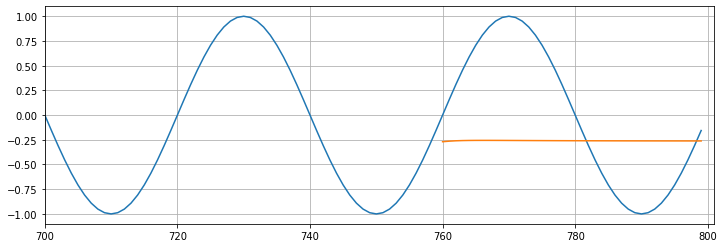

Epochs 2 has 0.04198049 loss
loss on test prediction is  tensor(0.5200)


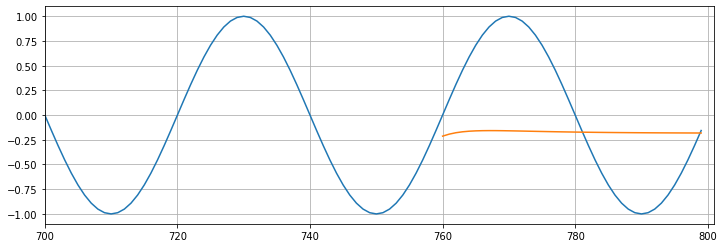

Epochs 3 has 0.01784276 loss
loss on test prediction is  tensor(0.4221)


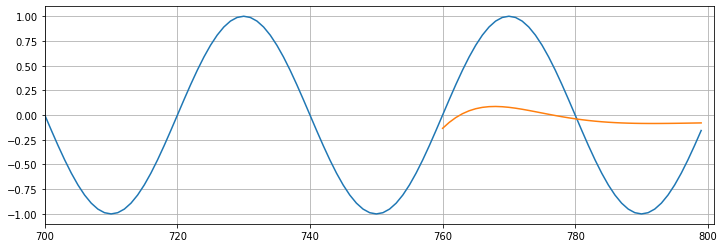

Epochs 4 has 0.00288710 loss
loss on test prediction is  tensor(0.1662)


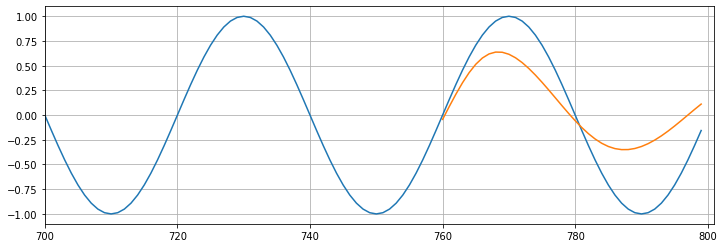

Epochs 5 has 0.00032008 loss
loss on test prediction is  tensor(0.0306)


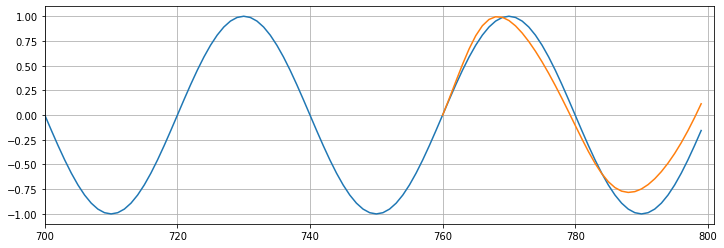

Epochs 6 has 0.00012969 loss
loss on test prediction is  tensor(0.0150)


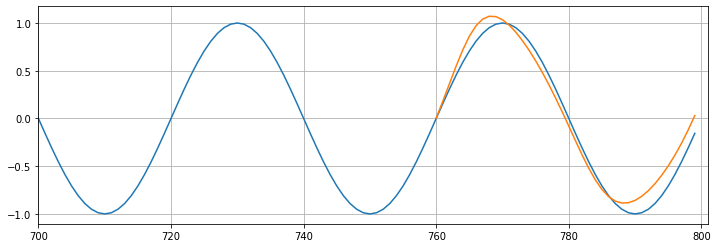

Epochs 7 has 0.00012007 loss
loss on test prediction is  tensor(0.0119)


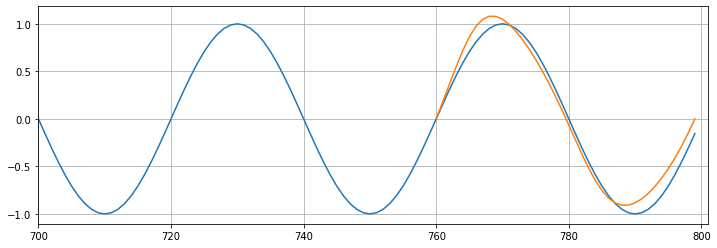

Epochs 8 has 0.00012656 loss
loss on test prediction is  tensor(0.0102)


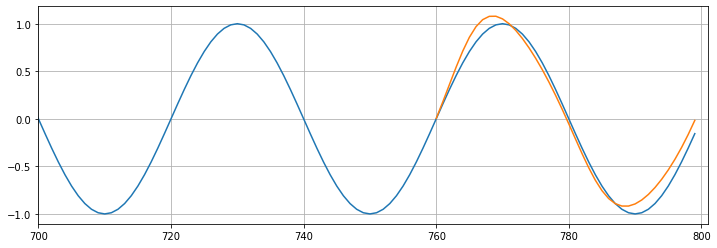

Epochs 9 has 0.00013195 loss
loss on test prediction is  tensor(0.0089)


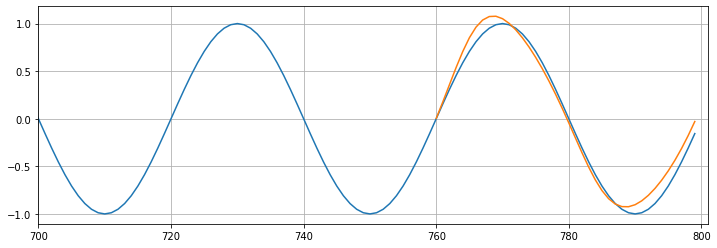

Epochs10 has 0.00013450 loss
loss on test prediction is  tensor(0.0079)


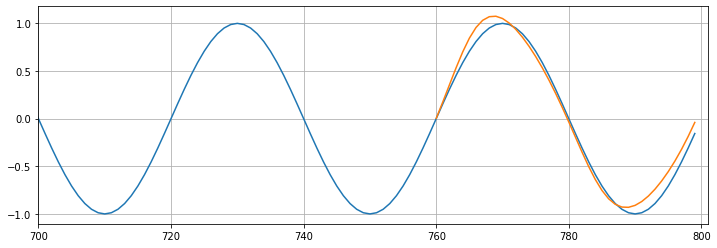

In [18]:
future = 40
epochs = 10

for i in range(epochs):
    
    for seq,y_train in train_data:
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        loss = criterion(y_pred,y_train)
        loss.backward()
        optimizer.step()
        
    print(f"Epochs{i+1:2} has {loss.item():10.8f} loss")
        
    preds = train_set[-window_size : ].tolist()
        
    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
                
    loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
    print("loss on test prediction is ",loss)
    
    
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800),preds[window_size:])
    plt.show()
        
    